In [1]:
import mglearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

/Users/WiNDWAY/Personal/book-notes/IntroductionToMachineLearningWithPython/venv/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Pre-processing

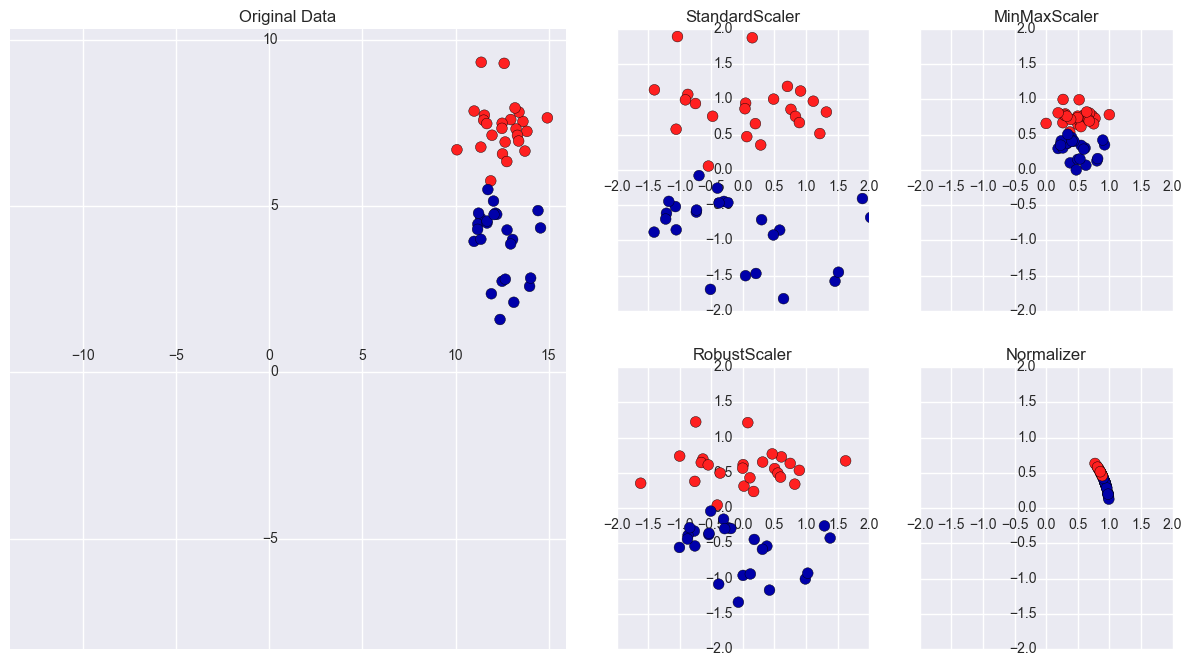

In [2]:
mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, 
                                                    cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
# Transform data
X_train_scaled = scaler.transform(X_train)
# Print dataset properties before and after scaling
print("Transformed shape: {}".format(X_train_scaled.shape))
print("Per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("Per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("Per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("Per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))

# Transform test data
X_test_scaled = scaler.transform(X_test)

# Print test data properties after scaling
print("Per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("Per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

Transformed shape: (426, 30)
Per-feature minimum before scaling:
 [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
Per-feature maximum before scaling:
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+0

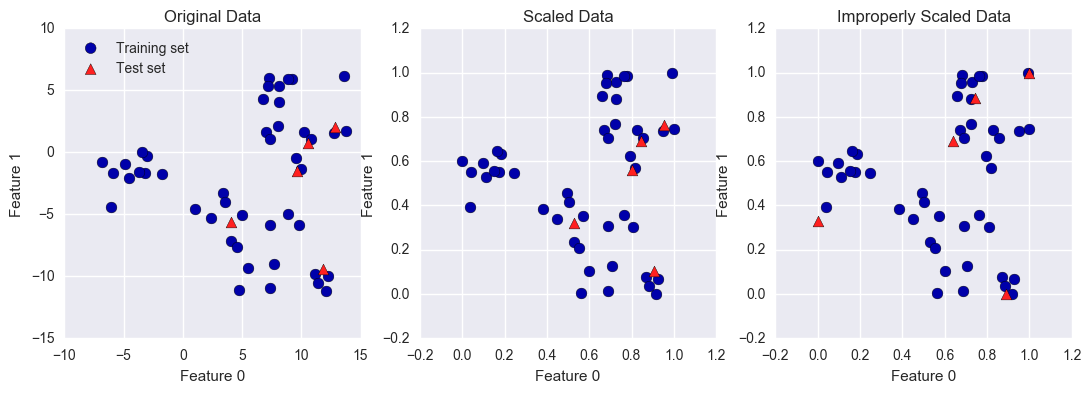

In [6]:
from sklearn.datasets import make_blobs
# Make synthetic data

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# Split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

# Plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), 
               label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', 
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', 
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# Rescale the test set separately
# So test set min is 0 and test set max is 1
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], 
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)

# Same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)

In [8]:
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

svm = SVC(C=100)
svm.fit(X_train, Y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, Y_test)))

Test set accuracy: 0.63


In [9]:
# Preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning an SVM on the scaled training data
svm.fit(X_train_scaled, Y_train)

# Scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, Y_test)))

Scaled test set accuracy: 0.97


In [10]:
# Preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning an SVM on the scaled training data
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, Y_test)))

SVM test accuracy: 0.95


### Dimensionality Reduction, Feature Extraction, and Manifold Learning

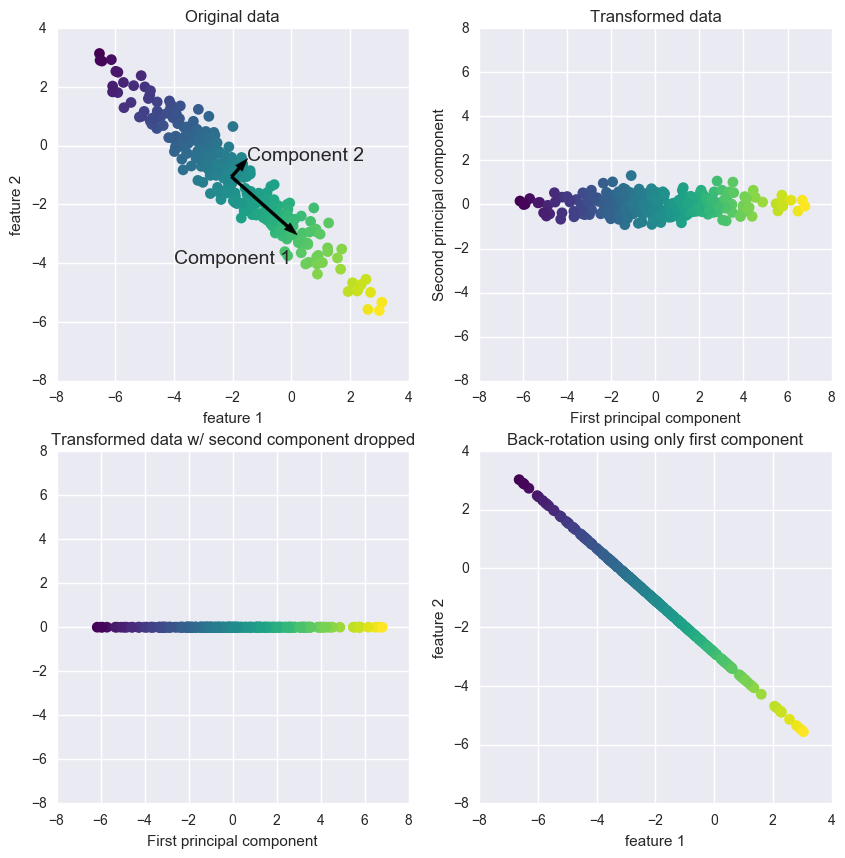

In [11]:
mglearn.plots.plot_pca_illustration()

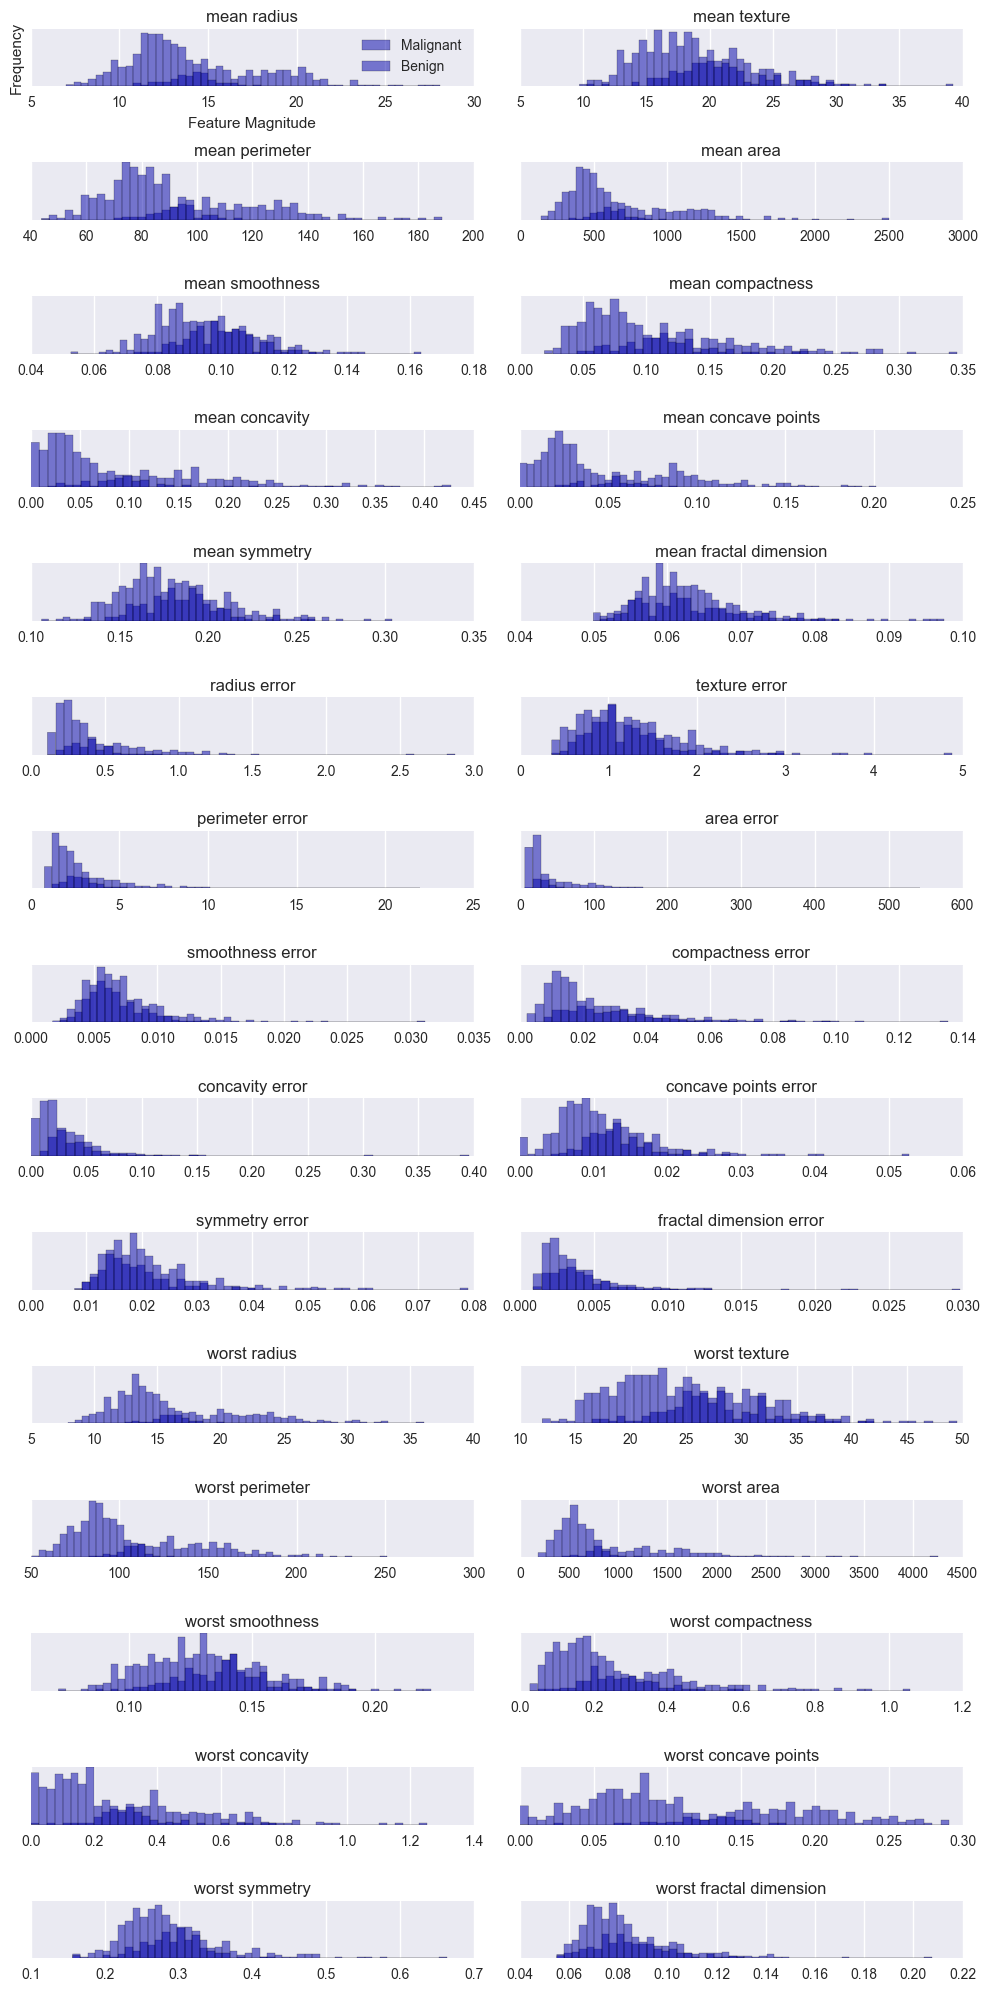

In [12]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature Magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['Malignant', 'Benign'], loc='best')
fig.tight_layout()

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [14]:
from sklearn.decomposition import PCA

# Keep the first two principal components of the data
pca = PCA(n_components=2)

# Fit the PCA model to breast cancer data
pca.fit(X_scaled)

# Transform data onto the first two principal components

X_pca = pca.transform(X_scaled)
print('Original shape: {}'.format(str(X_scaled.shape)))
print('Reduced shape: {}'.format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


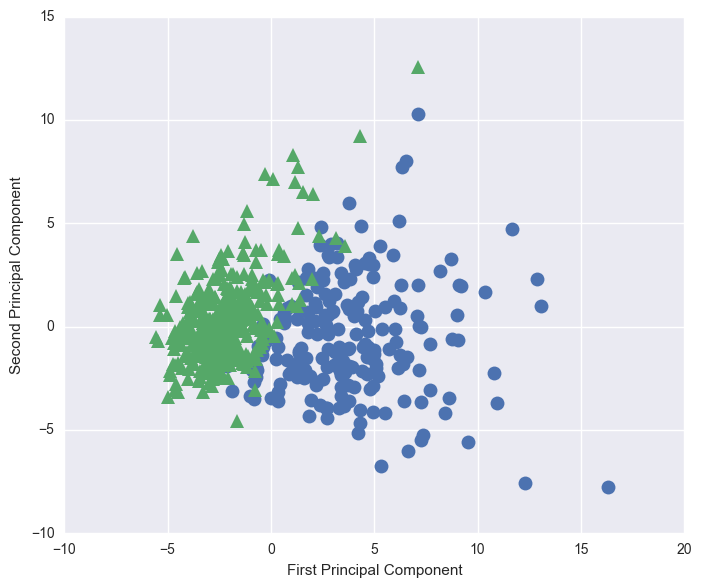

In [15]:
# Plot first vs second principal component, colored by class

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.gca().set_aspect('equal')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [16]:
print('PCA Component shape: {}'.format(pca.components_.shape))

PCA Component shape: (2, 30)


In [17]:
print('PCA Components:\n{}'.format(pca.components_))

PCA Components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


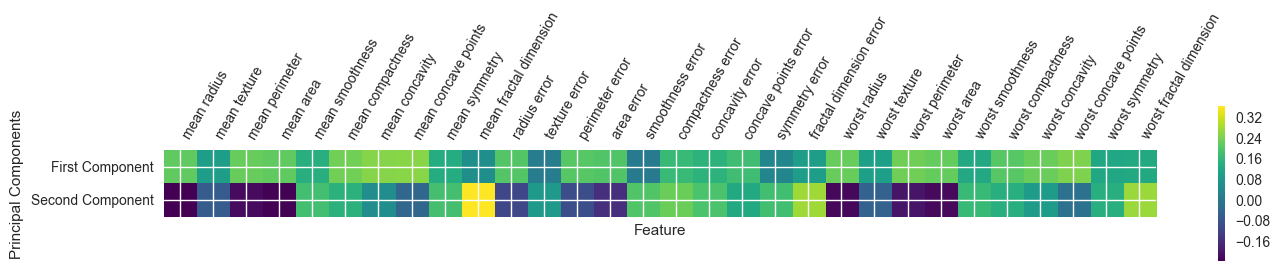

In [18]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['First Component', 'Second Component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Components")

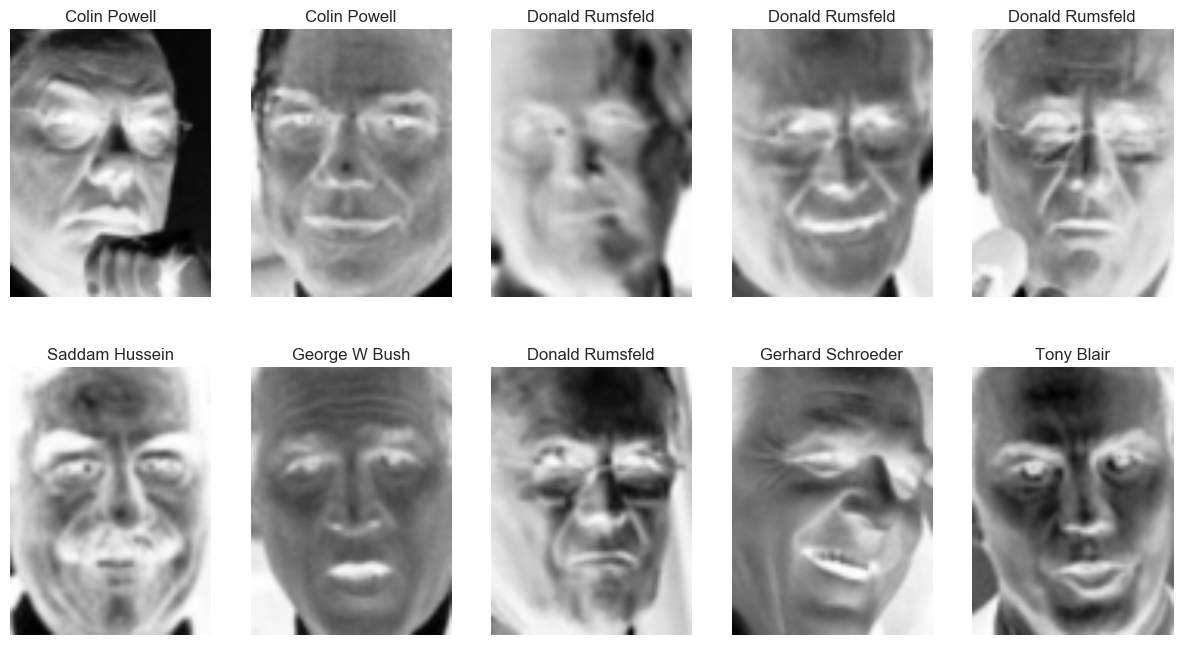

In [19]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [20]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (2183, 87, 65)
Number of classes: 33


In [21]:
# Count how often each target appears
counts = np.bincount(people.target)

# Print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{} {}'.format(name, count))

Alejandro Toledo 39
Alvaro Uribe 35
Amelie Mauresmo 21
Andre Agassi 36
Ariel Sharon 77
Atal Bihari Vajpayee 24
Bill Clinton 29
Colin Powell 236
Donald Rumsfeld 121
George Robertson 22
George W Bush 530
Gerhard Schroeder 109
Gloria Macapagal Arroyo 44
Hamid Karzai 22
Hans Blix 39
Igor Ivanov 20
Jacques Chirac 52
Jean Chretien 55
Jennifer Capriati 42
John Ashcroft 53
Junichiro Koizumi 60
Kofi Annan 32
Laura Bush 41
Lleyton Hewitt 41
Megawati Sukarnoputri 33
Pete Sampras 22
Saddam Hussein 23
Serena Williams 52
Tiger Woods 23
Tom Daschle 25
Tony Blair 144
Vicente Fox 32
Vladimir Putin 49


In [22]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
Y_people = people.target[mask]

# Scale the grayscale values to be between 0 and 1
# Instead of 0 and 255 for better numeric stability
X_people = X_people / 255

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Split the data intro training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_people, Y_people, 
                                                   stratify=Y_people, 
                                                    random_state=0)

# Build a KNN using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

print('Test set score of 1-nn: {:.2f}'.format(knn.score(X_test, Y_test)))

Test set score of 1-nn: 0.36


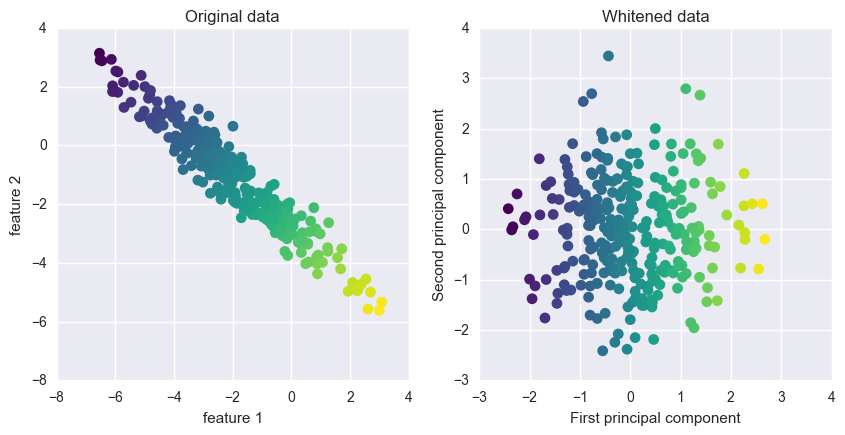

In [24]:
mglearn.plots.plot_pca_whitening()

In [25]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape: {}'.format(X_train_pca.shape))

X_train_pca.shape: (933, 100)


In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, Y_train)
print('Test set accuracy: {:.2f}'.format(knn.score(X_test_pca, Y_test)))

Test set accuracy: 0.43


In [27]:
print('pca.components_.shape: {}'.format(pca.components_.shape))

pca.components_.shape: (100, 5655)


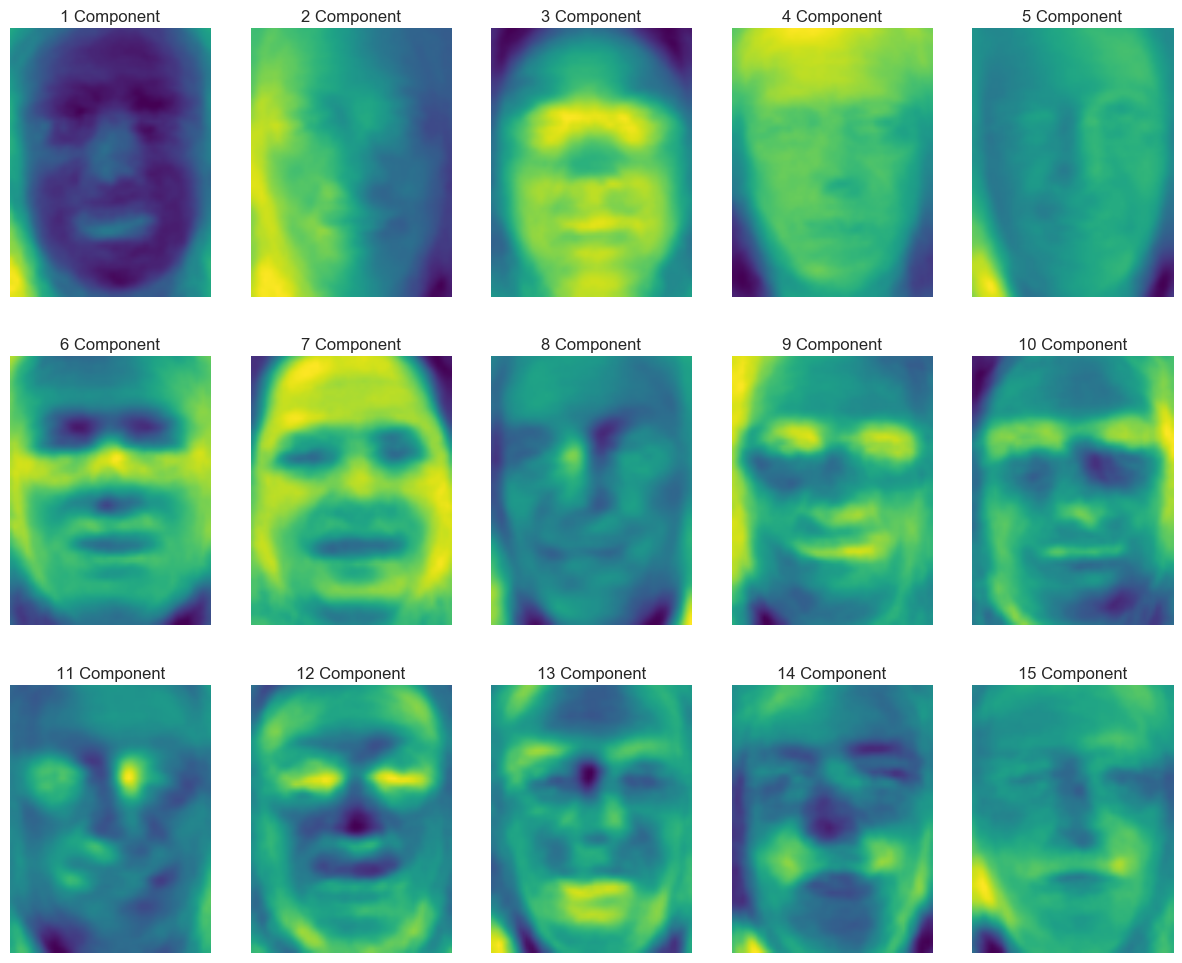

In [28]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), 
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{} Component".format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[ 0.445752, ...,  0.176471],
       ..., 
       [ 0.573856, ...,  0.128105]], dtype=float32), 
array([[ 0.517647, ...,  0.07451 ],
       ..., 
       [ 0.101961, ...,  0.164706]], dtype=float32))
________________________________________________________pca_faces - 3.8s, 0.1min


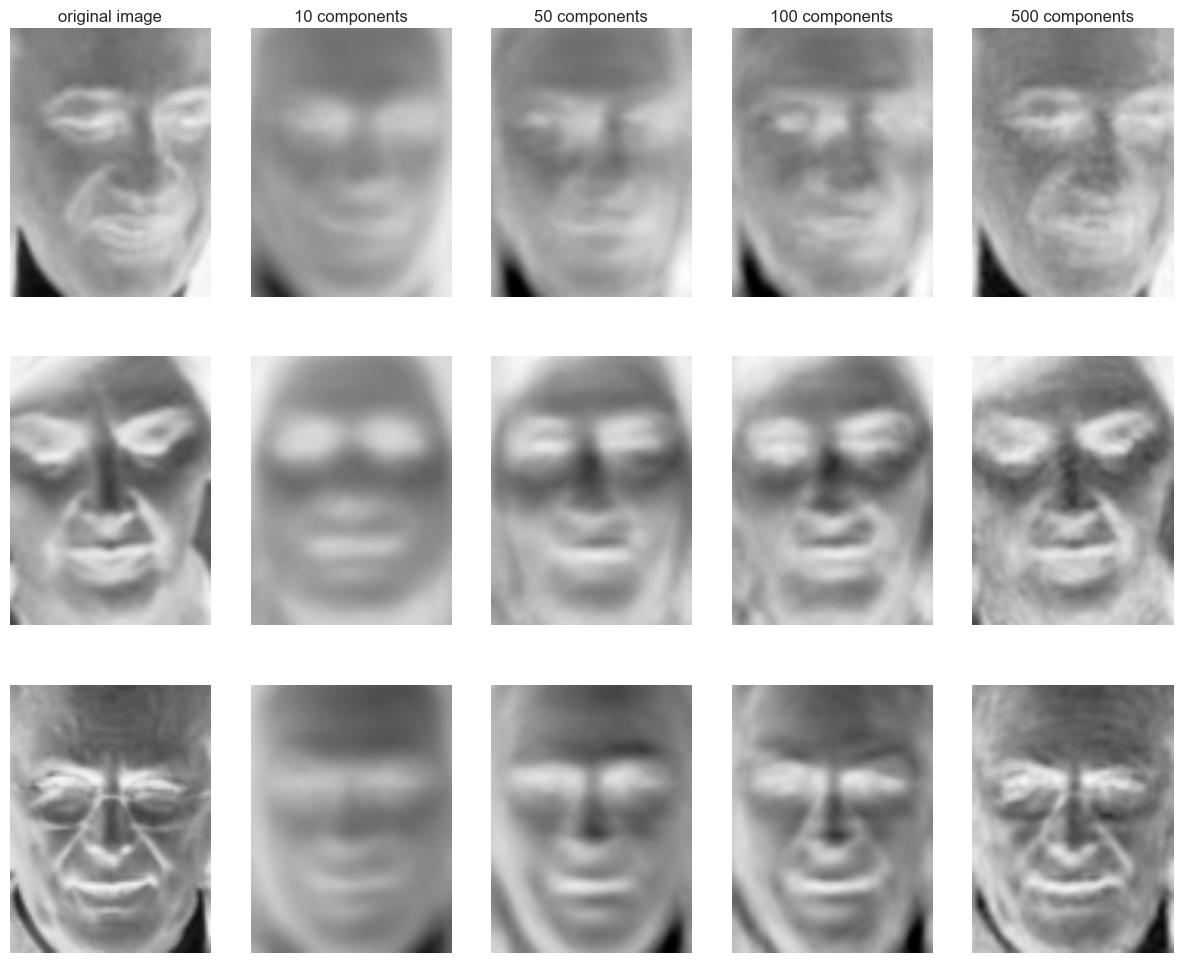

In [29]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

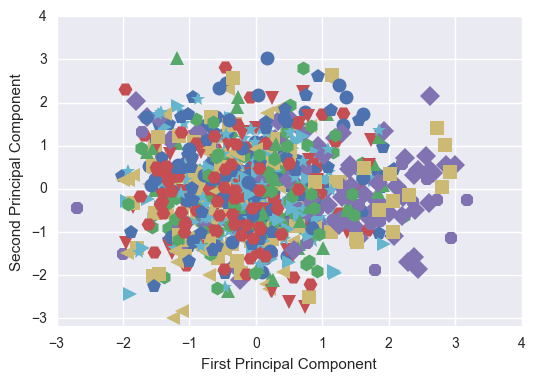

In [30]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], Y_train)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

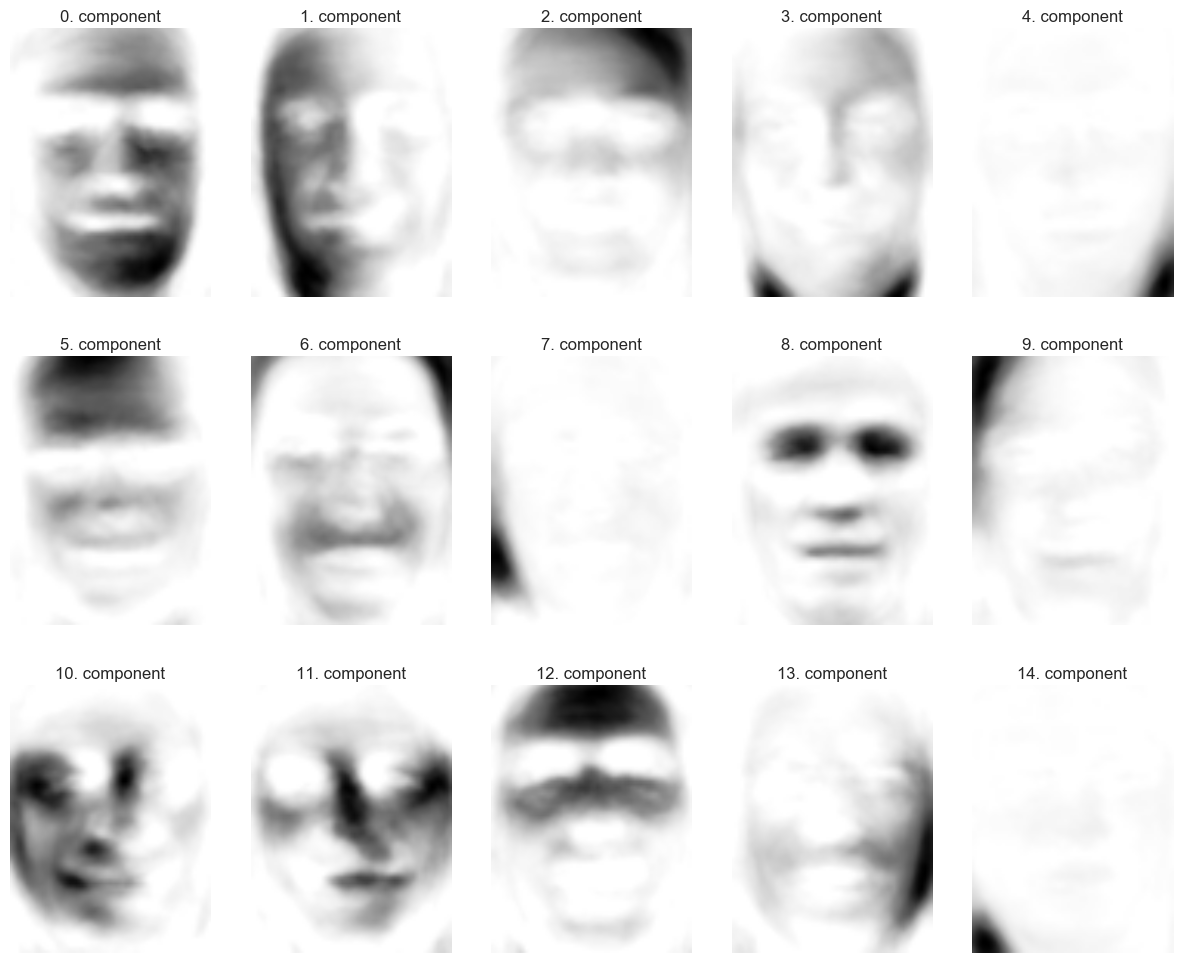

In [32]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

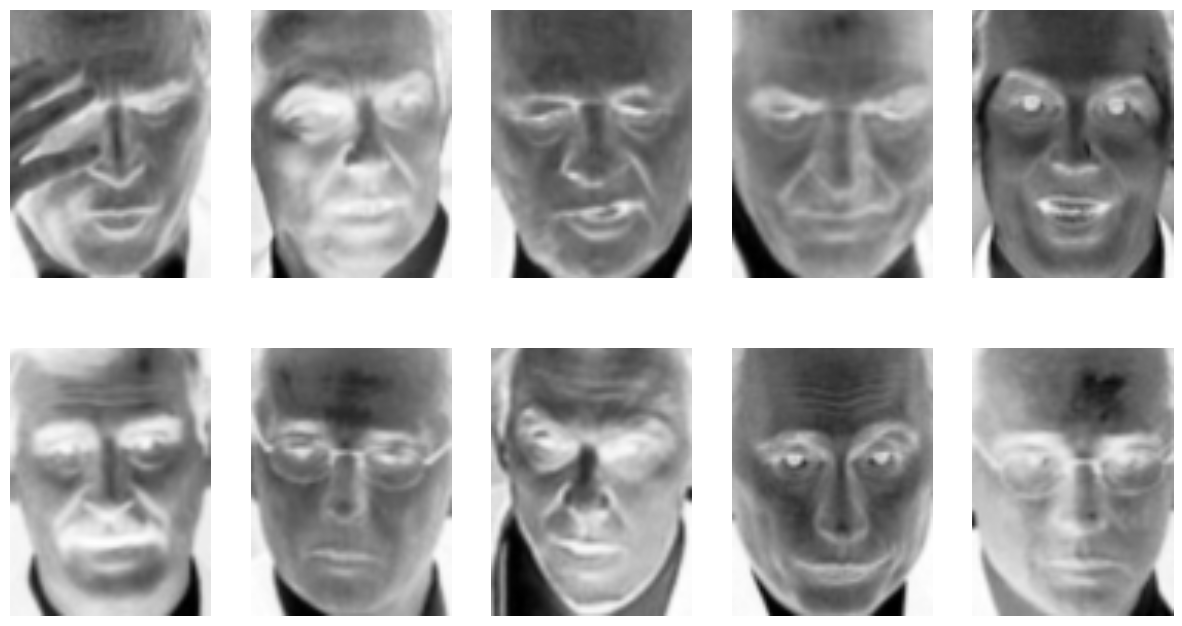

In [33]:
compn = 3
# Sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

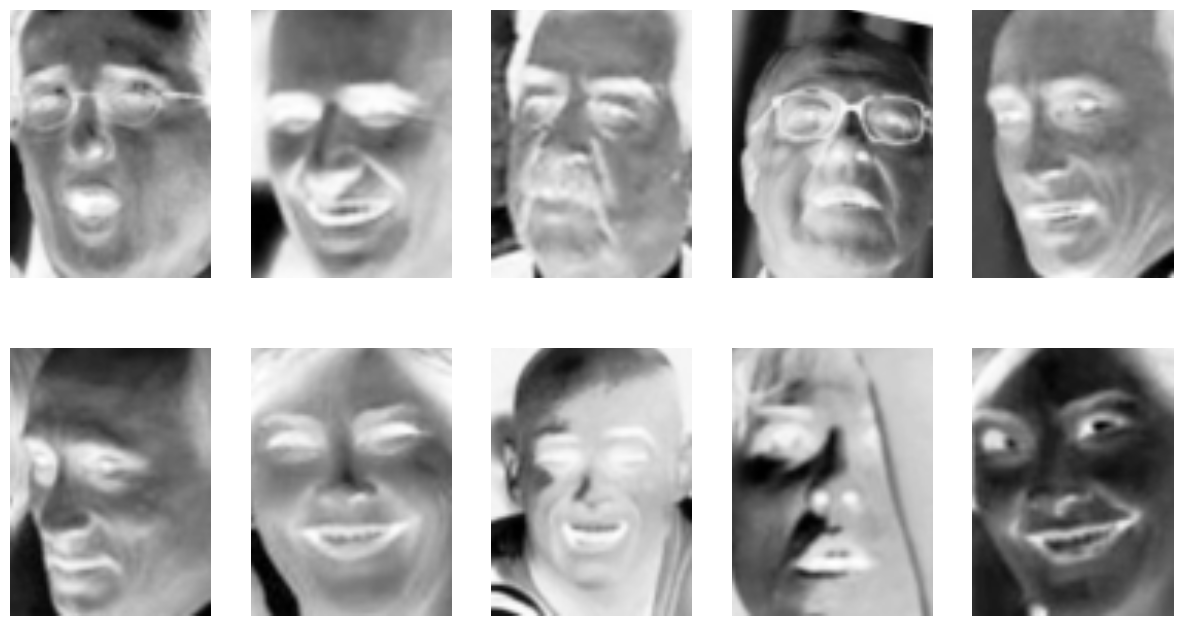

In [34]:
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

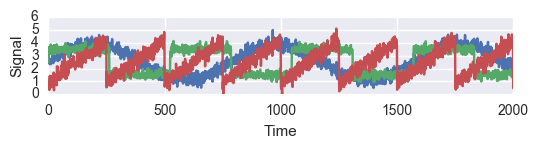

In [35]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [37]:
# Mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print('Shape of mesaurements: {}'.format(X.shape))

Shape of mesaurements: (2000, 100)


In [38]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print('Recovered signal shape: {}'.format(S_.shape))

Recovered signal shape: (2000, 3)


In [39]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

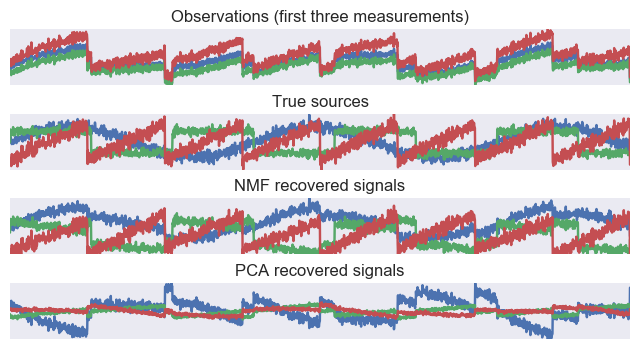

In [40]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)', 'True sources', 
         'NMF recovered signals', 'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': 0.5}, 
                        subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')